# Load data

In [32]:
import os

import numpy as np
import pandas as pd

DIR_PATH = os.path.join("titanic")
TRAIN_PATH = "train.csv"
TEST_PATH = "test.csv"

def load_titanic_data(data_path):
    csv_path = os.path.join(DIR_PATH, data_path)
    return pd.read_csv(csv_path)

titanic_tr = load_titanic_data(TRAIN_PATH) 
titanic_tr.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
titanic_te = load_titanic_data(TEST_PATH)
titanic_te.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# View data

In [34]:
titanic_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Numeric Values

In [35]:
titanic_tr.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


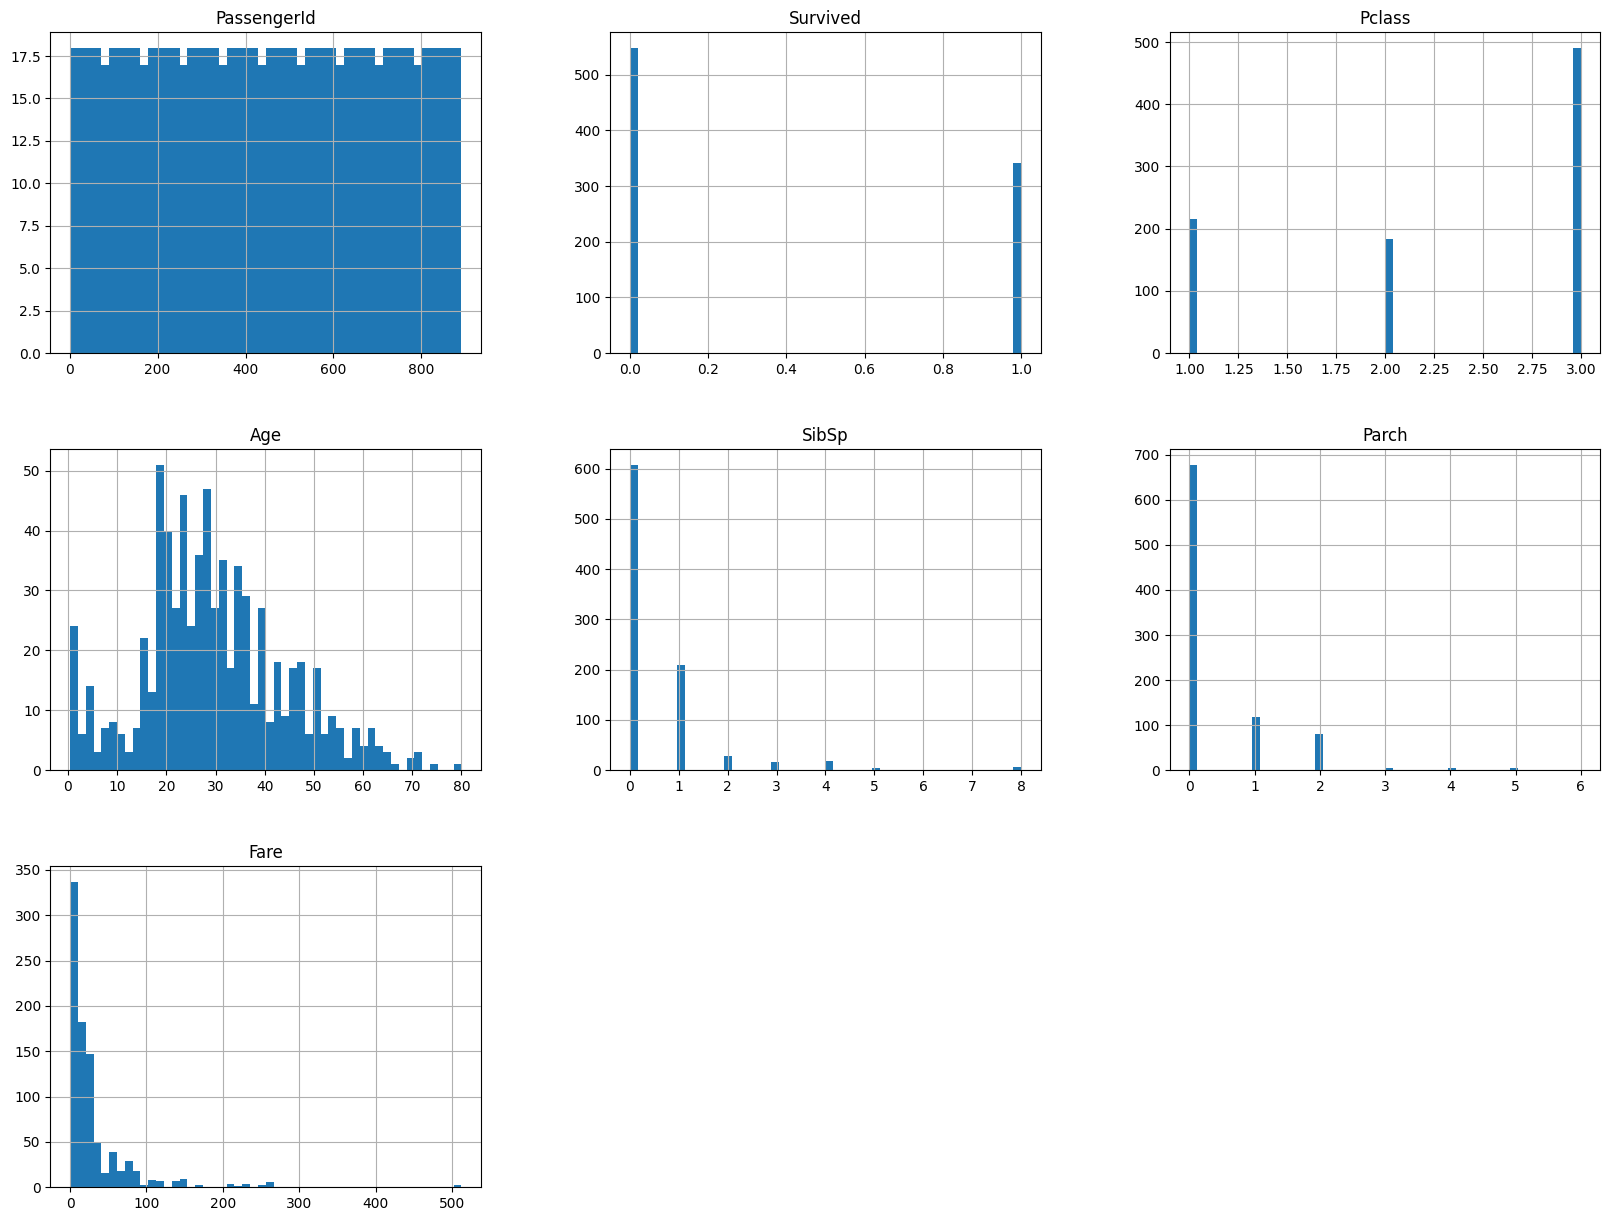

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
titanic_tr.hist(bins=50, figsize=(20, 15))
plt.savefig("titanic_hist_num.png")
plt.show()

### Categorical values

In [77]:
titanic_tr_cat = titanic_tr.select_dtypes(include='object')
titanic_tr_cat = titanic_tr_cat.drop(["Name", "Ticket"], axis = 1)
titanic_tr_cat

,Sex,Cabin,Embarked
0,male,NaN,S
1,female,C85,C
2,female,NaN,S
3,female,C123,S
4,male,NaN,S
...,...,...,...
886,male,NaN,S
887,female,B42,S
888,female,NaN,S
889,male,C148,C


In [91]:
titanic_tr_cat["Sex"].unique()

array(['male', 'female'], dtype=object)

In [92]:
for i in range(len(titanic_tr_cat)):
    if pd.notnull(titanic_tr_cat["Cabin"][i]):
        titanic_tr_cat.loc[i, "Cabin"] = titanic_tr_cat["Cabin"][i][0]

titanic_tr_cat["Cabin"].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [74]:
titanic_tr_cat["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [93]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_tr_cat_encoded = ordinal_encoder.fit_transform(titanic_tr_cat)
housing_tr_cat_encoded[:10]

array([[ 1., nan,  2.],
       [ 0.,  2.,  0.],
       [ 0., nan,  2.],
       [ 0.,  2.,  2.],
       [ 1., nan,  2.],
       [ 1., nan,  1.],
       [ 1.,  4.,  2.],
       [ 1., nan,  2.],
       [ 0., nan,  2.],
       [ 0., nan,  0.]])

# Preparing data

In [94]:
titanic_train = titanic_tr.drop(["Survived", "PassengerId", "Name", "Ticket"], axis = 1)
titanic_train_num = titanic_train.select_dtypes(include='number')
titanic_train_cat = titanic_train.select_dtypes(exclude='number')
titanic_label = titanic_tr["Survived"].copy()

### Num pipeline

In [96]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

correlations = pd.concat([pd.DataFrame(num_pipeline.fit_transform(titanic_train_num)), titanic_label], axis=1).corr()
correlations["Survived"].sort_values(ascending=False)

Survived    1.000000
4           0.257307
3           0.081629
2          -0.035322
1          -0.069809
0          -0.338481
Name: Survived, dtype: float64

### Cat pipeline

In [102]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

class CabinLetterExtractor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X = pd.DataFrame(X, columns=["Cabin", "Sex", "Embarked"])  # Ensure it works with array-like data
        X['Cabin'] = X['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else np.nan)
        return X

In [111]:
cat_pipeline = Pipeline([
    ('cabin_letter_extractor', CabinLetterExtractor()),
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('column_transformer', ColumnTransformer(transformers=[
        ('cabin_ord_enc', OrdinalEncoder(), [0,1]),
        ('sex_emb_ohe', OneHotEncoder(), [2])
    ]))
])

test = pd.DataFrame(cat_pipeline.fit_transform(titanic_train_cat))
test.describe()

,0,1,2,3,4
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.089787,0.647587,0.188552,0.086420,0.725028
std,0.724233,0.477990,0.391372,0.281141,0.446751
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,0.000000,1.000000
75%,2.000000,1.000000,0.000000,0.000000,1.000000
max,7.000000,1.000000,1.000000,1.000000,1.000000


### Full preprocess pipeline

In [112]:
num_attribs = list(titanic_train_num)
cat_attribs = list(titanic_train_cat)

preprocess_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', cat_pipeline, cat_attribs)
])

titanic_prepared = preprocess_pipeline.fit_transform(titanic_train)
titanic_prepared

array([[ 0.82737724, -0.5924806 ,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693,  0.63878901,  0.43279337, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724, -0.2846632 , -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.82737724,  0.        ,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693, -0.2846632 , -0.4745452 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724,  0.17706291, -0.4745452 , ...,  0.        ,
         1.        ,  0.        ]])

# Select & train model

In [115]:
titanic_survived = (titanic_label == 1)

### Binary classifier

In [113]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(titanic_prepared, titanic_label)

SGDClassifier(random_state=42)

In [118]:
from sklearn.model_selection import cross_val_predict

titanic_train_pred = cross_val_predict(sgd_clf, titanic_prepared, titanic_label, cv=3) ## returns the predictions instead of the scores

In [119]:
from sklearn.metrics import confusion_matrix
confusion_matrix(titanic_survived, titanic_train_pred) ## row = actual class || column = predicted class

array([[483,  66],
       [128, 214]])

#### Scores

In [120]:
from sklearn.metrics import precision_score, recall_score
precision_score(titanic_survived, titanic_train_pred)

np.float64(0.7642857142857142)

In [122]:
recall_score(titanic_survived, titanic_train_pred)

np.float64(0.6257309941520468)

In [123]:
from sklearn.metrics import f1_score
f1_score(titanic_survived, titanic_train_pred)

np.float64(0.6881028938906752)

### Random Forest Classifier

In [124]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
titanic_probas_forest = cross_val_predict(forest_clf, titanic_prepared, titanic_label, cv=3,
                                    method="predict_proba")

In [125]:
y_scores_forest = titanic_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(titanic_label,y_scores_forest)

#### Scores

In [126]:
from sklearn.metrics import roc_auc_score

roc_auc_score(titanic_label, y_scores_forest)

np.float64(0.8518411998423504)

In [127]:
y_train_pred_forest = cross_val_predict(forest_clf, titanic_prepared, titanic_label, cv=3)
precision_score(titanic_label, y_train_pred_forest)

np.float64(0.7392638036809815)

In [129]:
recall_score(titanic_label, y_train_pred_forest)

np.float64(0.7046783625730995)

In [130]:
confusion_matrix(titanic_survived, y_train_pred_forest)

array([[464,  85],
       [101, 241]])

In [131]:
f1_score(titanic_survived, y_train_pred_forest)

np.float64(0.7215568862275449)

In [132]:
y_scores = cross_val_predict(sgd_clf, titanic_prepared, titanic_label, cv=3, method="decision_function")

In [133]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(titanic_label, y_scores)

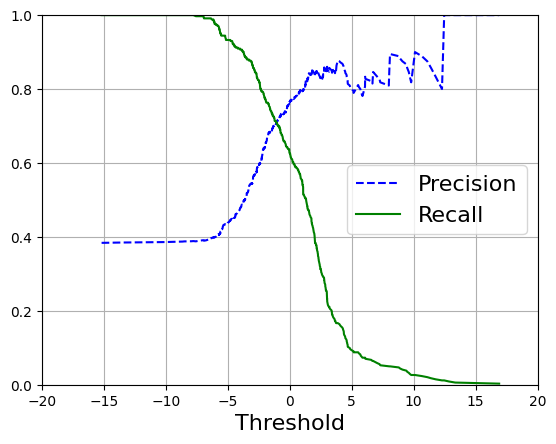

In [136]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-20, 20, 0, 1])             # Not shown
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

# Test

In [139]:
X_test = titanic_te.drop(["PassengerId", "Name", "Ticket"], axis = 1)
id_test = titanic_te["PassengerId"].copy()

X_test_prepared = preprocess_pipeline.transform(X_test)

forest_clf.fit(titanic_prepared, titanic_label)
final_predictions = forest_clf.predict(X_test_prepared)

In [140]:
import csv

# Define the path to save the CSV file
csv_file_path = 'predictions.csv'

# Open the CSV file for writing
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    # Write the header
    writer.writerow(['PassengerId', 'Survived'])
    
    # Write the data
    for id, prediction in zip(id_test, final_predictions):
        writer.writerow([id, prediction])